# Europlanet GMAP @ ERIM 2023

# PDS data load/view

This notebook provides some basic examples of GMAP Jupyter Hub-based ~reproducible processing (but Lab would do, too, if configured with similar environments - see: https://github.com/europlanet-gmap/docker-gmap - https://hub.docker.com/r/hyradus/isis-asp3-gispy). 

The use of markdown description and narrative might be useful to complement the documentation of eventual data processing (or analysis) steps. 

Several Open Source projects/libraries/tools are used, primarily USGS Astrogeology's [ISIS](https://github.com/DOI-USGS/ISIS3) (Laura et al., 2023).

This is only a very limited preview of basic use cases for reproducible planetary imaging data processing/reduction/quick visualisation workflows using Jupyter and the GMAP Hub (that you can install youself and deploy, see GMAP relevant repos.

This notebook has been run on the GMAP JupyerHub - jupyter.europlanet-gmap.eu/. One can deploy it anywhere. If, for example you install [gispy](https://hub.docker.com/r/hyradus/isis-asp3-gispy), and add relevant packages, change paths accordingly, you can run it anywhere.

If you find any inaccuracy or mistake, please reach out to [@aprossi](https://github.com/aprossi) or anyone from [GMAP](https://github.com/europlanet-gmap).


## Get data locally

See also https://gist.github.com/aprossi/fe0bbfd1d3bf22831d28b2a059385bd2

First one should download all MEGDR topo files with:

```
wget -c -r -l1 -e robots=off -nd -np -A 'megt*' \
https://pds-geosciences.wustl.edu/mgs/mgs-m-mola-5-megdr-l3-v1/mgsl_300x/meg128/
```

Other ways to search and download data (on the GMAP hub, or elsewhere, are exemplified in other notebooks.


## Load some utilities (to become part of a package), and environments

In this case [sh](https://amoffat.github.io/sh/) is useful. [Kalasiris](https://github.com/rbeyer/kalasiris) (Beyer, 2020)  is another option, used earlier in this notebook.

rasterio has been added at user level, also matplolib with ```pip```
<!-- Sh has been installed with:

```python -m pip install europlanet_gmap_gmappy-0.0.1.tar.gz```

after a quick build - see also https://packaging.python.org/en/latest/tutorials/packaging-projects/) -->

In [1]:
# OS & ISIS-related
import os
os.environ["ISISROOT"]="/opt/conda/envs/isis/"
os.environ["ISISDATA"]="/isis/data"
os.environ["PATH"]=os.environ["PATH"]+ os.pathsep + "/opt/conda/envs/isis/bin/"

# gmap inline data/basic medatata viewer (e.g. in-line cube viwer using rasterio pyramids
def qview(input_file):
    """Visualises a rasterio-edible file, including CRS. If too large, 
    it creates also overviews (.ovr)"""
    from rasterio.plot import show
    import rasterio
    import time
    start_time = time.perf_counter()
    # source data read into rasterio
    src = rasterio.open(input_file, 'r+')
    
    if src.overviews(1):
        # load with overviews 
        src = rasterio.open(input_file, 'r+', overview_level=2)
        show(src.read(1), cmap='gray')
        print(str(input_file))
        print('no overviews created')
    else:
        src.build_overviews([2, 4, 8, 16, 32]) 
        src = rasterio.open(input_file, 'r+', overview_level=2)
        show(src.read(1), cmap='gray')
        print(str(input_file))
        print('built overviews')
        # print CRS
    print(src.crs.to_proj4())
    stop_time=time.perf_counter()
    print('load time is: '+str(stop_time-start_time))
    # return(show(src.read(1),cmap='gray'))

## Import relevant ISIS commands on sh (or kalarisis, see below)

In [2]:
from sh import pds2isis, automos

In [19]:
pds2isis("-h")

FROM         = Null
IMAGE        = Null
TO           = Null
SETNULLRANGE = NO
NULLMIN      = Null
NULLMAX      = Null
SETHRSRANGE  = NO
HRSMIN       = Null
HRSMAX       = Null
SETHISRANGE  = NO
HISMIN       = Null
HISMAX       = Null
SETLRSRANGE  = NO
LRSMIN       = Null
LRSMAX       = Null
SETLISRANGE  = NO
LISMIN       = Null
LISMAX       = Null

In [20]:
automos("-h")

FROMLIST       = Null
MOSAIC         = Null
TOLIST         = Null
PRIORITY       = (*ONTOP, BENEATH, BAND, AVERAGE)
TYPE           = (*BANDNUMBER, KEYWORD)
NUMBER         = 1
KEYNAME        = OriginalBand
KEYVALUE       = 1
CRITERIA       = (*LESSER, GREATER)
GRANGE         = (*AUTO, USER)
MINLAT         = Null
MAXLAT         = Null
MINLON         = Null
MAXLON         = Null
TRACK          = FALSE
MATCHBANDBIN   = TRUE
MATCHDEM       = FALSE
HIGHSATURATION = FALSE
LOWSATURATION  = FALSE
NULL           = FALSE

## Load PDS data and do basic mosaicking

In this case, we downloaded all MEGDR topography data from the PDS Geosciences Node locally:

* Excerpt from https://pds-geosciences.wustl.edu/missions/mgs/megdr.html

MEGDR data files are named according to the scheme MEGkxxdyyyrv.IMG, where:
* k = A for areoid, C for counts, R for radius, T for topography
* xx = latitude of pixel in upper left corner of the image
* d = N for north latitude, S for south
* yyy = longitude of the pixel in the upper left corner of the image (0-360 east)
* r = map resolution in pixels per degree, e.g.
  * C = 4 pix/deg
  * E = 16 pix/deg
  * F = 32 pix/deg
  * G = 64 pix/deg
  * H = 128 pix/deg
  * v = version letter.


Data from https://pds-geosciences.wustl.edu/mgs/mgs-m-mola-5-megdr-l3-v1/mgsl_300x/meg128/





In [6]:
!ls ~/shared/global_data/Mars/megdr128/*.lbl

/home/jovyan/shared/global_data/Mars/megdr128/megt00n000hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt00n090hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt00n180hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt00n270hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt44n000hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt44n090hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt44n180hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt44n270hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt44s000hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt44s090hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt44s180hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt44s270hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt88n000hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt88n090hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt88n180hb.lbl
/home/jovyan/shared/global_data/Mars/megdr128/megt88n27

In [7]:
input_dir='/home/jovyan/shared/global_data/Mars/megdr128/'
automos_list_file = input_dir+'automos.list'
automos_list = open(automos_list_file, mode='a')
to_mosaic = input_dir+'automos.cub'
    
for dirname, dirnames, filenames in os.walk(input_dir):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        if filename.endswith('.lbl'):
            basename=os.path.splitext(filename)
            # print(basename)
            outname = basename[0]+'.cub'
            input_file = (os.path.join(dirname, filename))
            output_file = (os.path.join(dirname,outname))
            print('input file: '+input_file)
            print('output file: '+output_file)
            
            # PDS2ISIS
            # pds2isis(input_file,to=output_file)
            pds2isis("from=",input_file, "to=",output_file)
            
            # Create automost list
            # this might not be needed as there is already:
            # https://github.com/rbeyer/kalasiris/blob/main/kalasiris/fromlist.py
            automos_list.write(output_file+'\n')
automos_list.close()

# PERFORM AUTOMOS
automos("fromlist=", automos_list_file, "mosaic=", to_mosaic, "matchbandbin=false") 

/home/jovyan/shared/global_data/Mars/megdr128/OLD
/home/jovyan/shared/global_data/Mars/megdr128/.empty
input file: /home/jovyan/shared/global_data/Mars/megdr128/megt44s090hb.lbl
output file: /home/jovyan/shared/global_data/Mars/megdr128/megt44s090hb.cub
input file: /home/jovyan/shared/global_data/Mars/megdr128/megt00n270hb.lbl
output file: /home/jovyan/shared/global_data/Mars/megdr128/megt00n270hb.cub
input file: /home/jovyan/shared/global_data/Mars/megdr128/megt44n000hb.lbl
output file: /home/jovyan/shared/global_data/Mars/megdr128/megt44n000hb.cub
input file: /home/jovyan/shared/global_data/Mars/megdr128/megt44s270hb.lbl
output file: /home/jovyan/shared/global_data/Mars/megdr128/megt44s270hb.cub
input file: /home/jovyan/shared/global_data/Mars/megdr128/megt88n000hb.lbl
output file: /home/jovyan/shared/global_data/Mars/megdr128/megt88n000hb.cub
input file: /home/jovyan/shared/global_data/Mars/megdr128/megt44n180hb.lbl
output file: /home/jovyan/shared/global_data/Mars/megdr128/megt44n1

Group = ImageLocation
  File        = /home/jovyan/shared/global_data/Mars/megdr128/megt44s090hb.cub
  StartSample = 11521
  StartLine   = 16897
End_Group

Group = ImageLocation
  File        = /home/jovyan/shared/global_data/Mars/megdr128/megt00n270hb.cub
  StartSample = 34561
  StartLine   = 11265
End_Group

Group = ImageLocation
  File        = /home/jovyan/shared/global_data/Mars/megdr128/megt44n000hb.cub
  StartSample = 1
  StartLine   = 5633
End_Group

Group = ImageLocation
  File        = /home/jovyan/shared/global_data/Mars/megdr128/megt44s270hb.cub
  StartSample = 34561
  StartLine   = 16897
End_Group

Group = ImageLocation
  File        = /home/jovyan/shared/global_data/Mars/megdr128/megt88n000hb.cub
  StartSample = 1
  StartLine   = 1
End_Group

Group = ImageLocation
  File        = /home/jovyan/shared/global_data/Mars/megdr128/megt44n180hb.cub
  StartSample = 23041
  StartLine   = 5633
End_Group

Group = ImageLocation
  File        = /home/jovyan/shared/global_data/Mars/meg

## Load and visualise some raster planetary data

For generic PDS data viewers please refer to:

* https://github.com/MillionConcepts/pdr (StClair, et al. 2023)

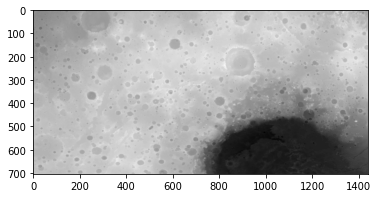

/home/jovyan/shared/global_data/Mars/megdr128/megt00n000hb.cub
no overviews created
+proj=eqc +lat_ts=0 +lat_0=0 +lon_0=180 +x_0=0 +y_0=0 +R=3396000 +units=m +no_defs=True
load time is: 0.500468073412776


In [21]:
input="/home/jovyan/shared/global_data/Mars/megdr128/megt00n000hb.cub"
qview(input)

## Reduce the size of the mosaic

In [22]:
import os
# os.environ["ISISROOT"]="/opt/conda/envs/isis/"
# os.environ["ISISDATA"]="/isis/data"
# import kalasiris as isis
# from kalasiris import reduce
from sh import reduce

input_file = '/home/jovyan/shared/global_data/Mars/megdr128/automos.cub'
output_file = '/home/jovyan/shared/global_data/Mars/megdr128/automos.reduced.cub'

# # PERFORM REDUCE
reduce("from=", input_file, "to=", output_file, "sscale=", 10, "lscale=", 10) 

Group = Results
  InputLines      = 22528
  InputSamples    = 46080
  StartingLine    = 1
  StartingSample  = 1
  EndingLine      = 22528
  EndingSample    = 46080
  LineIncrement   = 10.0
  SampleIncrement = 10.0
  OutputLines     = 2253
  OutputSamples   = 4608
End_Group

## Visualise the reduced mosaic

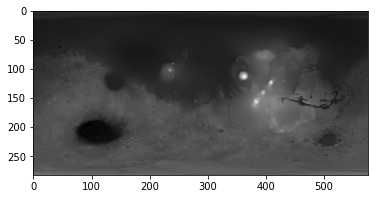

/home/jovyan/shared/global_data/Mars/megdr128/automos.reduced.cub
no overviews created
+proj=eqc +lat_ts=0 +lat_0=0 +lon_0=180 +x_0=0 +y_0=0 +R=3396000 +units=m +no_defs=True
load time is: 0.40972403436899185


In [23]:
qview(output_file)

## Visualise labels of the isis cube

In [24]:
import os
from sh import catlab

input_file = '/home/jovyan/shared/global_data/Mars/megdr128/automos.reduced.cub'

# # PERFORM catlab
catlab("from=", input_file) 

Object = IsisCube
  Object = Core
    StartByte   = 65537
    Format      = Tile
    TileSamples = 768
    TileLines   = 751

    Group = Dimensions
      Samples = 4608
      Lines   = 2253
      Bands   = 1
    End_Group

    Group = Pixels
      Type       = SignedWord
      ByteOrder  = Lsb
      Base       = 0.0
      Multiplier = 1.0
    End_Group
  End_Object

  Group = BandBin
    FilterName = NA
  End_Group

  Group = Mapping
    ProjectionName     = SimpleCylindrical
    CenterLongitude    = 180.0
    TargetName         = Mars
    EquatorialRadius   = 3396000.0 <meters>
    PolarRadius        = 3396000.0 <meters>
    LatitudeType       = Planetocentric
    LongitudeDirection = PositiveEast
    LongitudeDomain    = 360
    MinimumLatitude    = -88.0
    MaximumLatitude    = 88.0
    MinimumLongitude   = 0.0
    MaximumLongitude   = 360.0
    UpperLeftCornerX   = -10667520.0
    UpperLeftCornerY   = 5215232.0
    PixelResolution    = 4630.0 <meters/pixel>
    Scale             

## Change of CRS

One can generate such a [map_template](https://isis.astrogeology.usgs.gov/Application/presentation/Tabbed/maptemplate/maptemplate.html)

### Original CRS

see above ```catlab``` output:

```
 Group = Mapping
    ProjectionName     = SimpleCylindrical
    CenterLongitude    = 180.0
    TargetName         = Mars
    EquatorialRadius   = 3396000.0 <meters>
    PolarRadius        = 3396000.0 <meters>
    LatitudeType       = Planetocentric
    LongitudeDirection = PositiveEast
    LongitudeDomain    = 360
    MinimumLatitude    = -88.0
    MaximumLatitude    = 88.0
    MinimumLongitude   = 0.0
    MaximumLongitude   = 360.0
    UpperLeftCornerX   = -10667520.0
    UpperLeftCornerY   = 5215232.0
    PixelResolution    = 4630.0 <meters/pixel>
    Scale              = 12.8 <pixels/degree>
  End_Group
```

Such map template is analogous to the proj4 string (see also CRS visualised via qview):

```
+proj=eqc +lat_ts=0 +lat_0=0 +lon_0=180 +x_0=0 +y_0=0 +R=3396000 +units=m +no_defs=True
```


### Target CRS

One can e.g. reproject to - say - a :

```
 Group = Mapping
    ProjectionName     = Sinusoidal
    CenterLongitude    = 0
    TargetName         = Mars
    EquatorialRadius   = 3396000.0 <meters>
    PolarRadius        = 3396000.0 <meters>
    LatitudeType       = Planetocentric
    LongitudeDirection = PositiveEast
    LongitudeDomain    = 180
    PixelResolution    = 4630.0 <meters/pixel>
  End_Group
```

using ```map2maap```

The same can be of course achieved with [GDAL](https://gdal.org), e.g. via ```gdalwarp```:



## Populate the map file

Arguments cannot be passed individually via ```map2map```. A map parameter file is needed, or it can be produced by ```maptemplate```, see below.

In [25]:
# This an be tweaked as needed, for now it is just a minimalistic way to populate and generate a map template 

# define parametets
map_file_start = 'Group = Mapping'
map_file_stop = 'End_Group'
out_map_file = '/home/jovyan/shared/global_data/Mars/megdr128/out.map'
Projection_name = "Equirectangular"
Center_lontitude = "0"
TargetName = "Mars"
EquatorialRadius = "3396000.0 <meters>"
PolarRadius = "3396000.0 <meters>"
LatitudeType = "Planetocentric"
LongitudeDirection = "PositiveEast"
LongitudeDomain = "180"
PixelResolution    = "4630.0 <meters/pixel>"

# create output file
open(out_map_file, 'w+').close()

# fill file with stuff
with open(out_map_file, "w") as outfile:
    # outfile.write('area='+str(area_crisium[0]/1000000)+'\n')
    outfile.write(map_file_start+'\n')
    outfile.write("\t"+"Projection_name = "+Projection_name+'\n')
    outfile.write("\t"+"Center_lontitude = "+Center_lontitude+'\n')
    outfile.write("\t"+"TargetName = "+TargetName+'\n')
    outfile.write("\t"+"EquatorialRadius = "+EquatorialRadius+'\n')
    outfile.write("\t"+"PolarRadius = "+PolarRadius+'\n')
    outfile.write("\t"+"LatitudeType = "+LatitudeType+'\n')
    outfile.write("\t"+"LongitudeDirection = "+LongitudeDirection+'\n')
    outfile.write("\t"+"LongitudeDomain = "+LongitudeDomain+'\n')
    outfile.write("\t"+"PixelResolution = "+PixelResolution+'\n')

    outfile.write(map_file_stop)

# visualise file
f = open(out_map_file, 'r')
file_contents = f.read()
print(file_contents)

Group = Mapping
	Projection_name = Equirectangular
	Center_lontitude = 0
	TargetName = Mars
	EquatorialRadius = 3396000.0 <meters>
	PolarRadius = 3396000.0 <meters>
	LatitudeType = Planetocentric
	LongitudeDirection = PositiveEast
	LongitudeDomain = 180
	PixelResolution = 4630.0 <meters/pixel>
End_Group


## Or, using ```maptemplate```

This is more streamlined and less error-pronte, using [maptemplate](https://isis.astrogeology.usgs.gov/Application/presentation/Tabbed/maptemplate/maptemplate.html).





In [3]:
from sh import maptemplate
maptemplate("-h")

MAP         = Null
FROMLIST    = Null
PROJECTION  = (*SINUSOIDAL, MERCATOR, TRANSVERSEMERCATOR, ORTHOGRAPHIC,
               POLARSTEREOGRAPHIC, SIMPLECYLINDRICAL, EQUIRECTANGULAR,
               LAMBERTCONFORMAL, LAMBERTAZIMUTHALEQUALAREA, OBLIQUECYLINDRICAL,
               POINTPERSPECTIVE, ROBINSON)
CLON        = Null
CLAT        = Null
SCALEFACTOR = Null
PAR1        = Null
PAR2        = Null
PLAT        = Null
PLON        = Null
PROT        = Null
DIST        = Null
TARGOPT     = (*NONE, SELECT, USER)
FILE        = Null
TARGETNAME  = Null
LATTYPE     = (*PLANETOCENTRIC, PLANETOGRAPHIC)
LONDIR      = (*POSITIVEEAST, POSITIVEWEST)
LONDOM      = (*360, 180)
EQRADIUS    = Null
POLRADIUS   = Null
RNGOPT      = (*NONE, USER, CALC)
MINLAT      = Null
MAXLAT      = Null
MINLON      = Null
MAXLON      = Null
RESOPT      = (*NONE, MPP, PPD, CALC)
RESOLUTION  = Null
RESCALCOPT  = (*HIGH, LOW, AVERAGE)

In [26]:
# define parametets
map_file_start = 'Group = Mapping'
map_file_stop = 'End_Group'
out_map_file = '/home/jovyan/shared/global_data/Mars/megdr128/out.map'
Projection_name = "LambertConformal"
CenterLontitude = "0"
CenterLatitude = "50"
StandardParallel1 = "30"
StandardParallel2 = "40"
TargetName = "Mars"
EquatorialRadius = "3396000.0"
PolarRadius = "3396000.0"
LatitudeType = "Planetocentric"
LongitudeDirection = "PositiveEast"
LongitudeDomain = "180"

maptemplate("map=", out_map_file,
            "projection=",Projection_name,
            "clon=", CenterLontitude,
            "clat=", CenterLatitude,
            "par1=", StandardParallel1,
            "par2=",StandardParallel2,
            "targetname=", TargetName,
            "targopt=", "user",
            "eqradius=", EquatorialRadius,
            "polradius=", PolarRadius,
            "londom=", LongitudeDomain,
            "londir=", LongitudeDirection
            
)

# visualise file
f = open(out_map_file, 'r')
file_contents = f.read()
print(file_contents)

Group = Mapping
  ProjectionName         = LambertConformal
  CenterLongitude        = 0.0
  CenterLatitude         = 50.0
  FirstStandardParallel  = 30.0
  SecondStandardParallel = 40.0
  TargetName             = Mars
  EquatorialRadius       = 3396000.0 <meters>
  PolarRadius            = 3396000.0 <meters>
  LatitudeType           = Planetocentric
  LongitudeDirection     = PositiveEast
  LongitudeDomain        = 180
End_Group
End



## Reproject with map2map

In [22]:
import os
from sh import map2map

input_file = '/home/jovyan/shared/global_data/Mars/megdr128/automos.reduced.cub'
reprojected_file = '/home/jovyan/shared/global_data/Mars/megdr128/automos.reduced.out.cub'
output_map = '/home/jovyan/shared/global_data/Mars/megdr128/out.map'

# # PERFORM REDUCE
map2map("from=", input_file, "to=", reprojected_file, "map=", output_map,
       "minlon=", -90, "maxlon=", 90, 
        # "minlat=", 0, "maxlat=", 90,
        "defaultrange=", "map",
       "trim=", "true",
       "pixres=", "mpp",
       "resolution=", 40000)
        

Group = Mapping
  TargetName             = Mars
  ProjectionName         = LambertConformal
  EquatorialRadius       = 3396000.0 <meters>
  PolarRadius            = 3396000.0 <meters>
  LatitudeType           = Planetocentric
  LongitudeDirection     = PositiveEast
  LongitudeDomain        = 180
  PixelResolution        = 40000.0 <meters/pixel>
  Scale                  = 1.4817845349432 <pixels/degree>
  UpperLeftCornerX       = -56360000.0 <meters>
  UpperLeftCornerY       = 3520000.0 <meters>
  MinimumLatitude        = -88.0
  MaximumLatitude        = 88.0
  MinimumLongitude       = -90.0
  MaximumLongitude       = 90.0
  CenterLatitude         = 50.0
  CenterLongitude        = 0.0
  FirstStandardParallel  = 30.0
  SecondStandardParallel = 40.0
End_Group

## Visualise output reprojected cube vs. original

In [23]:
from sh import catlab
catlab("from=", reprojected_file) 

Object = IsisCube
  Object = Core
    StartByte   = 65537
    Format      = Tile
    TileSamples = 939
    TileLines   = 892

    Group = Dimensions
      Samples = 2817
      Lines   = 1784
      Bands   = 1
    End_Group

    Group = Pixels
      Type       = SignedWord
      ByteOrder  = Lsb
      Base       = 0.0
      Multiplier = 1.0
    End_Group
  End_Object

  Group = BandBin
    FilterName = NA
  End_Group

  Group = Mapping
    ProjectionName         = LambertConformal
    CenterLongitude        = 0.0
    TargetName             = Mars
    EquatorialRadius       = 3396000.0 <meters>
    PolarRadius            = 3396000.0 <meters>
    LatitudeType           = Planetocentric
    LongitudeDirection     = PositiveEast
    LongitudeDomain        = 180
    MinimumLatitude        = -88.0
    MaximumLatitude        = 88.0
    MinimumLongitude       = -90.0
    MaximumLongitude       = 90.0
    UpperLeftCornerX       = -56360000.0 <meters>
    UpperLeftCornerY       = 3520000.0 <meter

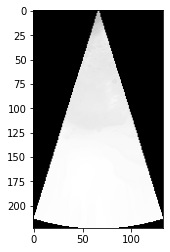

/home/jovyan/shared/global_data/Mars/megdr128/automos.reduced.out.cub
no overviews created
+proj=lcc +lat_0=50 +lon_0=0 +lat_1=30 +lat_2=40 +x_0=0 +y_0=0 +R=3396000 +units=m +no_defs=True
load time is: 0.37868800945580006


In [24]:
qview(reprojected_file)

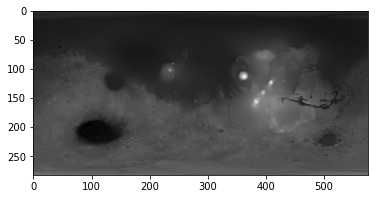

/home/jovyan/shared/global_data/Mars/megdr128/automos.reduced.cub
no overviews created
+proj=eqc +lat_ts=0 +lat_0=0 +lon_0=180 +x_0=0 +y_0=0 +R=3396000 +units=m +no_defs=True
load time is: 0.4034118205308914


In [25]:
qview(input_file)

## Doing the same with Kalasiris 
The same can be achieved with Kalarisis (Beyer, 2020). It is basically the same.

```python
# this is a markdown cell with a code block & syntax highlighting, not a code cell ;-) 
# you cannot run it.. 

import os

os.environ["ISISROOT"]="/opt/conda/envs/isis/"
os.environ["ISISDATA"]="/isis/data"
import kalasiris as isis
from kalasiris import pds2isis, automos

input_dir='~/shared/global_data/Mars/megdr128/'
automos_list_file = input_dir+'automos.list'
automos_list = open(automos_list_file, 'a')
to_mosaic = input_dir+'automos.cub'
    
for dirname, dirnames, filenames in os.walk(input_dir):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        if filename.endswith('.lbl'):
            basename=os.path.splitext(filename)
            # print(basename)
            outname = basename[0]+'.cub'
            input_file = (os.path.join(dirname, filename))
            output_file = (os.path.join(dirname,outname))
            print('input file: '+input_file)
            print('output file: '+output_file)
            
            # PDS2ISIS
            pds2isis(input_file,to=output_file)
            
            # Create automost list
            # this might not be needed as there is already:
            # https://github.com/rbeyer/kalasiris/blob/main/kalasiris/fromlist.py
            automos_list.write(output_file+'\n')
automos_list.close()

# PERFORM AUTOMOS
automos(fromlist_=automos_list_file, mosaic=to_mosaic, matchbandbin_='false') 

# and so on...
# ...
```
    
    

## Concluding remarks

Several datasets are nowadays available at analysis-ready data, or fondational products. See e.g.:

* https://openplanetary.discourse.group/c/planetary-datasets/35

Materials displayed here are just exemplary.

## References

Beyer, R. A. (2020). Kalasiris, a Python Library for Calling ISIS Programs. In 51st Annual Lunar and Planetary Science Conference (No. 2326, p. 2441) - https://www.hou.usra.edu/meetings/lpsc2020/pdf/2441.pdf

Laura, Jason, Acosta, Alex, Addair, Travis, Adoram-Kershner, Lauren, Alexander, James, Alexandrov, Oleg, Alley, Stacey, Anderson, Don, Anderson, James, Anderson, Jeff, Annex, Andrew, Archinal, Brent, Austin, Christopher, Backer, Jeanie, Barrett, Janet, Bauck, Kirsten, Bauers, Joni, Becker, Kris, Becker, Tammy, … Young, Aaron. (2023). Integrated Software for Imagers and Spectrometers (7.2.0_RC1). Zenodo. https://doi.org/10.5281/zenodo.7644616

Stclair, M. Sierra V. Brown, curtiss9, Chase Million, & Michael Aye. (2023). MillionConcepts/pdr: v1.0.0 (v1.0.0). Zenodo. https://doi.org/10.5281/zenodo.8006781

## Relevant Links

* PDS Geosciences node - https://pds-geosciences.wustl.edu
* USGS ISIS Github - https://github.com/DOI-USGS/ISIS3
  * USSGS ISIS Github wiki - https://github.com/DOI-USGS/ISIS3/wiki
* Openplanetary Forum - https://openplanetary.discourse.group